<a href="https://colab.research.google.com/github/neamagalal/machine/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import warnings
warnings.filterwarnings("ignore")
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
#nltk.download()
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('word_tokenize')
!pip install --upgrade pandas

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index


In [2]:
# read parameters for old data
#,engine='python' , error_bad_lines=False, encoding='latin-1',dtype='string

In [3]:
path = '/content/drive/MyDrive/150000 tweets to Huawei in 2021-10-10 00:00:00.csv'

data_source =pd.read_csv(path,dtype='string')
print(data_source .shape)

(481535, 22)


In [4]:
print(data_source.shape)
# filter with lang and verfied
data_source = data_source [data_source .lang == "en"]
verified_list = ['False','True']
print("size after filter with lang ",data_source.shape)
data_source = data_source[data_source['verified'].isin(verified_list)]
print("size after filter with verified ",data_source.shape)

data_source  = data_source [data_source ['description'].notnull()]
data_source  = data_source [data_source ['text'].notnull()]

print("size after filter with NULL ",data_source.shape)

(481535, 22)
size after filter with lang  (156870, 22)
size after filter with verified  (128825, 22)
size after filter with NULL  (105666, 22)


In [5]:
 def find_emoji(description):
     emoji_pattern = re.findall("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags 
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            "]", description)
     return emoji_pattern
data_source['emojii'] = data_source.description.apply(find_emoji) 
#data_source['emojii'] = data_source['emojii'].str.replace('[',']', '')
data_source.head(200)

,Unnamed: 0,text,author_id,created_at,tweet_id,entities,lang,possibly_sensitive,source,retweet_count,reply_count,like_count,quote_count,referenced_tweets,id,username,description,profile_image_url,url,User_location,verified,name,emojii
0,0,RT @Ronald_vanLoon: This #DeepLearning app is ...,22422258,2021-10-09 23:57:54+00:00,1446988323092901890,"{'mentions': [{'start': 3, 'end': 18, 'usernam...",en,False,Twitter for iPhone,101,0,0,0,"[{'type': 'retweeted', 'id': '1446782011901890...",22422258,Ariella09,"Psychologist interested in marriage, family an...",https://pbs.twimg.com/profile_images/480516465...,<NA>,Chicago,False,Ronald K. Phillips,[]
9,9,RT @Huawei: Watch the #HuaweiConnect 2021 Day ...,618722891,2021-10-09 23:49:05+00:00,1446986102208827394,"{'mentions': [{'start': 3, 'end': 10, 'usernam...",en,False,Twitter for Android,97,0,0,0,"[{'type': 'retweeted', 'id': '1441205731353522...",618722891,HandojoWu,Eastern philosophies enthusiast. Perpetual lea...,https://pbs.twimg.com/profile_images/144992819...,https://t.co/imtdN5pBzI,Jakarta - Indonesia 🇮🇩,False,Handojo Wu,[]
14,14,RT @drb_ra: Cobalt Strike Server Found C2: HTT...,1281947625512751105,2021-10-09 23:46:56+00:00,1446985560648716289,"{'mentions': [{'start': 3, 'end': 10, 'usernam...",en,False,Twitter,1,0,0,0,"[{'type': 'retweeted', 'id': '1446983221678415...",1281947625512751105,fe_tsoc,A SOC protecting the grid. Bot maintained by @...,https://pbs.twimg.com/profile_images/128200877...,<NA>,,False,Security Operations Center,[]
15,15,3A 2M Magnetic USB Cable For iPhone X Magnet C...,1272880127261753344,2021-10-09 23:46:41+00:00,1446985498078162949,"{'annotations': [{'start': 29, 'end': 99, 'pro...",en,False,SocialRabbit Plugin,0,0,0,0,,1272880127261753344,Aliziya84458001,Welcome to Aliziya store! Worldwide Online Sh...,https://pbs.twimg.com/profile_images/127641688...,https://t.co/kPxgnf1dWT,,False,Aliziya,[]
16,16,The executive of China’s Huawei industrial com...,172141399,2021-10-09 23:45:41+00:00,1446985247967547393,"{'annotations': [{'start': 17, 'end': 21, 'pro...",en,False,Twitter for iPhone,0,0,0,0,,172141399,jackthecat11,"Ex-hippie, baby-boomer concerned abt relitigat...",https://pbs.twimg.com/profile_images/173831622...,<NA>,"Washington, DC",False,JackMack,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,257,@_pixellate Go for a Samsung Galaxy A71 or Hua...,1427893372514078732,2021-10-09 21:32:54+00:00,1446951832480276480,"{'annotations': [{'start': 21, 'end': 38, 'pro...",en,False,Twitter for Android,0,0,1,0,"[{'type': 'replied_to', 'id': '144695139529538...",1427893372514078732,Hanzi_69,14/01 F1 lover bikes ❤️🏍️ fishing 🎣 Sneaker...,https://pbs.twimg.com/profile_images/145655435...,<NA>,In the Path Of Allah,False,حنظلة نانابي,"[❤, ️, 🏍, ️, 🎣, ❤, ️, 🔥]"
259,258,RT @KareemRifai: The United States battled Hua...,1317508825826643968,2021-10-09 21:32:41+00:00,1446951779627843586,"{'annotations': [{'start': 17, 'end': 33, 'pro...",en,False,Twitter Web App,149,0,0,0,"[{'type': 'retweeted', 'id': '1446900003490910...",1317508825826643968,Frederi65567491,41 and living in my mom's basement,https://pbs.twimg.com/profile_images/131750928...,<NA>,,False,Frederic,[]
260,259,RT @KareemRifai: The United States battled Hua...,742189818193547264,2021-10-09 21:32:31+00:00,1446951737344937989,"{'annotations': [{'start': 17, 'end': 33, 'pro...",en,False,Twitter Web App,149,0,0,0,"[{'type': 'retweeted', 'id': '1446900003490910...",742189818193547264,LiberalAutocrat,"Black I guess, #BLM, whatever pronoun man",https://pbs.twimg.com/profile_images/742190120...,<NA>,Your head,False,John Smith 🔞 Based Mang0,[]
261,260,RT @Baakfanmouyan: After the Meng Wanzhou saga...,1076412384820920320,2021-10-09 21:32:22+00:00,1446951697457291266,"{'annotations': [{'start': 29, 'end': 40, 'pro...",en,False,Twitter for iPad,4,0,0,0,"[{'type': 'retweeted', 'id': '1446804303528792...",1076412384820920320,IvyVFHK,concerned citizen,https://pbs.twimg.com/

In [6]:
# ADD Hashtage

def find_hashtags(text):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', text)   
data_source['hashtags'] = data_source.text.apply(find_hashtags)  
data_source.head(200)

,Unnamed: 0,text,author_id,created_at,tweet_id,entities,lang,possibly_sensitive,source,retweet_count,reply_count,like_count,quote_count,referenced_tweets,id,username,description,profile_image_url,url,User_location,verified,name,emojii,hashtags
0,0,RT @Ronald_vanLoon: This #DeepLearning app is ...,22422258,2021-10-09 23:57:54+00:00,1446988323092901890,"{'mentions': [{'start': 3, 'end': 18, 'usernam...",en,False,Twitter for iPhone,101,0,0,0,"[{'type': 'retweeted', 'id': '1446782011901890...",22422258,Ariella09,"Psychologist interested in marriage, family an...",https://pbs.twimg.com/profile_images/480516465...,<NA>,Chicago,False,Ronald K. Phillips,[],"[#DeepLearning, #AI, #ArtificialIntelligence, ..."
9,9,RT @Huawei: Watch the #HuaweiConnect 2021 Day ...,618722891,2021-10-09 23:49:05+00:00,1446986102208827394,"{'mentions': [{'start': 3, 'end': 10, 'usernam...",en,False,Twitter for Android,97,0,0,0,"[{'type': 'retweeted', 'id': '1441205731353522...",618722891,HandojoWu,Eastern philosophies enthusiast. Perpetual lea...,https://pbs.twimg.com/profile_images/144992819...,https://t.co/imtdN5pBzI,Jakarta - Indonesia 🇮🇩,False,Handojo Wu,[],"[#HuaweiConnect, #DiveIntoDigital]"
14,14,RT @drb_ra: Cobalt Strike Server Found C2: HTT...,1281947625512751105,2021-10-09 23:46:56+00:00,1446985560648716289,"{'mentions': [{'start': 3, 'end': 10, 'usernam...",en,False,Twitter,1,0,0,0,"[{'type': 'retweeted', 'id': '1446983221678415...",1281947625512751105,fe_tsoc,A SOC protecting the grid. Bot maintained by @...,https://pbs.twimg.com/profile_images/128200877...,<NA>,,False,Security Operations Center,[],[]
15,15,3A 2M Magnetic USB Cable For iPhone X Magnet C...,1272880127261753344,2021-10-09 23:46:41+00:00,1446985498078162949,"{'annotations': [{'start': 29, 'end': 99, 'pro...",en,False,SocialRabbit Plugin,0,0,0,0,,1272880127261753344,Aliziya84458001,Welcome to Aliziya store! Worldwide Online Sh...,https://pbs.twimg.com/profile_images/127641688...,https://t.co/kPxgnf1dWT,,False,Aliziya,[],"[#happy, #streetstyle, #moda]"
16,16,The executive of China’s Huawei industrial com...,172141399,2021-10-09 23:45:41+00:00,1446985247967547393,"{'annotations': [{'start': 17, 'end': 21, 'pro...",en,False,Twitter for iPhone,0,0,0,0,,172141399,jackthecat11,"Ex-hippie, baby-boomer concerned abt relitigat...",https://pbs.twimg.com/profile_images/173831622...,<NA>,"Washington, DC",False,JackMack,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,257,@_pixellate Go for a Samsung Galaxy A71 or Hua...,1427893372514078732,2021-10-09 21:32:54+00:00,1446951832480276480,"{'annotations': [{'start': 21, 'end': 38, 'pro...",en,False,Twitter for Android,0,0,1,0,"[{'type': 'replied_to', 'id': '144695139529538...",1427893372514078732,Hanzi_69,14/01 F1 lover bikes ❤️🏍️ fishing 🎣 Sneaker...,https://pbs.twimg.com/profile_images/145655435...,<NA>,In the Path Of Allah,False,حنظلة نانابي,"[❤, ️, 🏍, ️, 🎣, ❤, ️, 🔥]",[]
259,258,RT @KareemRifai: The United States battled Hua...,1317508825826643968,2021-10-09 21:32:41+00:00,1446951779627843586,"{'annotations': [{'start': 17, 'end': 33, 'pro...",en,False,Twitter Web App,149,0,0,0,"[{'type': 'retweeted', 'id': '1446900003490910...",1317508825826643968,Frederi65567491,41 and living in my mom's basement,https://pbs.twimg.com/profile_images/131750928...,<NA>,,False,Frederic,[],[]
260,259,RT @KareemRifai: The United States battled Hua...,742189818193547264,2021-10-09 21:32:31+00:00,1446951737344937989,"{'annotations': [{'start': 17, 'end': 33, 'pro...",en,False,Twitter Web App,149,0,0,0,"[{'type': 'retweeted', 'id': '1446900003490910...",742189818193547264,LiberalAutocrat,"Black I guess, #BLM, whatever pronoun man",https://pbs.twimg.com/profile_images/742190120...,<NA>,Your head,False,John Smith 🔞 Based Mang0,[],[]
261,260,RT @Baakfanmouyan: After the Meng Wanzhou saga...,1076412384820920320,2021-10-09 21:32:22+00:00,1446951697457291266,"{'annotations': [{'start': 29, 'end': 40, 'pro...",en,Fa

In [7]:
 def remove_emoji(text):
     emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags 
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            "]+", flags=re.UNICODE)
     return emoji_pattern.sub(r'', text)
 data_source ['description']= data_source ['description'].apply(lambda x: remove_emoji(x))
 data_source ['text']= data_source ['text'].apply(lambda x: remove_emoji(x))



In [8]:
# Clean Description 
data_source ['clean_description'] = data_source ['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_source ['clean_description'] = data_source ['clean_description'].str.replace('http\S+', '')# url
data_source ['clean_description'] = data_source ['clean_description'].str.replace('https?:\/\/\s+]','')# url
data_source ['clean_description'] = data_source ['clean_description'].str.replace('#','')
data_source ['clean_description'] = data_source ['clean_description'].str.replace(r'@[A-Za-z0-9]+@[^a-zA-Z]','')#mention
data_source ['clean_description'] = data_source ['clean_description'].str.replace('@\S+','')#mention
data_source ['clean_description'] = data_source ['clean_description'].str.replace('rt[\s]','') #retweet
data_source ['clean_description'] = data_source ['clean_description'].str.replace('[^\w\s]','')#not letters
data_source ['clean_description'] = data_source ['clean_description'].str.replace('[^a-zA-Z]',' ')#not letters
data_source ['clean_description'] = data_source ['clean_description'].str.replace('\'',' ')#not letters
data_source ['clean_description'] = data_source ['clean_description'].str.replace(" '",' ')#not letters
stop = set(stopwords.words('english'))#remove_stopwords 
stop.update(["amp","im","going","'","que","getting","thats","ive","gonna",'\'']) 
#stop.update(["amp","today",,"one","though","got","work","lol","think","im","going","tonight","love","still","cant","ye","thing","'"]) 
data_source ['clean_description']= data_source ['clean_description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))



In [9]:
# Clean Text 

data_source ['clean_text'] = data_source ['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_source ['clean_text'] = data_source ['clean_text'].str.replace('http\S+', '')# url
data_source ['clean_text'] = data_source ['clean_text'].str.replace('https?:\/\/\s+]','')# url
data_source ['clean_text'] = data_source ['clean_text'].str.replace('#[A-Za-z0-9]+#[^a-zA-Z]','')
data_source ['clean_text'] = data_source ['clean_text'].str.replace('#\S+','')#mention
data_source ['clean_text'] = data_source ['clean_text'].str.replace(r'@[A-Za-z0-9]+@[^a-zA-Z]','')#mention
data_source ['clean_text'] = data_source ['clean_text'].str.replace('@\S+','')#mention
data_source ['clean_text'] = data_source ['clean_text'].str.replace('rt[\s]','') #retweet
data_source ['clean_text'] = data_source ['clean_text'].str.replace('https?:\/\/\s+]','')# url
data_source ['clean_text'] = data_source ['clean_text'].str.replace('[^\w\s\[0-9]]',' ')#not letters
#data_source ['clean_text'] = data_source ['clean_text'].str.replace('[^a-zA-Z]',' ')#not letters
data_source ['clean_text'] = data_source ['clean_text'].str.replace('[^A-Za-z0-9]',' ')#not letters
#data_source ['clean_text'] = data_source ['clean_text'].str.replace('http\S+', '')# url
data_source ['clean_text'] = data_source ['clean_text'].str.replace('\'',' ')#not letters
data_source ['clean_text'] = data_source ['clean_text'].str.replace(" '",' ')#not letters
stop2 = set(stopwords.words('english'))#remove_stopwords
stop2.update(["amp","im","going","'","que","getting","thats","ive","gonna",'\'']) 
#stop2.update(["amp","im","going","tonight","valimai","'","que","getting","thats","ive","gonna",'\'']) 

data_source ['clean_text']= data_source ['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop2))


In [10]:
print (data_source.shape)

data_source  = data_source [data_source ['clean_description'].notnull()]
data_source  = data_source [data_source ['clean_text'].notnull()]

print (data_source.shape)

# data_source .head(10)

(105666, 26)
(105666, 26)


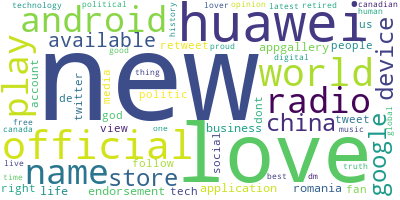

In [11]:
# Word Cloud clean_description

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data_source ['clean_description'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=60, contour_width=15, collocations=False,contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

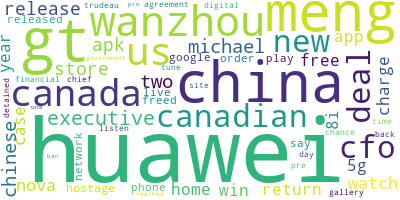

In [12]:
# Word Cloud clean_description

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data_source ['clean_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=60,collocations=False, contour_width=15, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

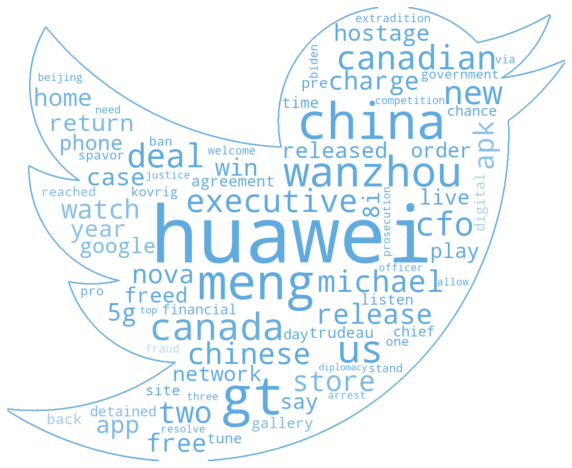

In [13]:
# Word Cloud clean_text 3asforaaa

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import plotly.express as pex
import numpy as np
import matplotlib.pyplot as plt

import urllib
import requests
# combining the image with the dataset
long_string = ','.join(list(data_source ['clean_text'].values))
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream = True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color="white",contour_width=3, contour_color='#6DB1E0', max_words=80,collocations=False, mask = Mask).generate(long_string)

# Size of the image generated 
plt.figure(figsize = (10, 20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "hamming")
plt.axis('off')
plt.show()

In [14]:
data_source.head(200)

,Unnamed: 0,text,author_id,created_at,tweet_id,entities,lang,possibly_sensitive,source,retweet_count,reply_count,like_count,quote_count,referenced_tweets,id,username,description,profile_image_url,url,User_location,verified,name,emojii,hashtags,clean_description,clean_text
0,0,RT @Ronald_vanLoon: This #DeepLearning app is ...,22422258,2021-10-09 23:57:54+00:00,1446988323092901890,"{'mentions': [{'start': 3, 'end': 18, 'usernam...",en,False,Twitter for iPhone,101,0,0,0,"[{'type': 'retweeted', 'id': '1446782011901890...",22422258,Ariella09,"Psychologist interested in marriage, family an...",https://pbs.twimg.com/profile_images/480516465...,<NA>,Chicago,False,Ronald K. Phillips,[],"[#DeepLearning, #AI, #ArtificialIntelligence, ...",psychologist interested marriage family integr...,app detecting garbage images cc
9,9,RT @Huawei: Watch the #HuaweiConnect 2021 Day ...,618722891,2021-10-09 23:49:05+00:00,1446986102208827394,"{'mentions': [{'start': 3, 'end': 10, 'usernam...",en,False,Twitter for Android,97,0,0,0,"[{'type': 'retweeted', 'id': '1441205731353522...",618722891,HandojoWu,Eastern philosophies enthusiast. Perpetual lea...,https://pbs.twimg.com/profile_images/144992819...,https://t.co/imtdN5pBzI,Jakarta - Indonesia 🇮🇩,False,Handojo Wu,[],"[#HuaweiConnect, #DiveIntoDigital]",eastern philosophies enthusiast perpetual lear...,watch 2021 day 2 diving digital practice lives...
14,14,RT @drb_ra: Cobalt Strike Server Found\nC2: HT...,1281947625512751105,2021-10-09 23:46:56+00:00,1446985560648716289,"{'mentions': [{'start': 3, 'end': 10, 'usernam...",en,False,Twitter,1,0,0,0,"[{'type': 'retweeted', 'id': '1446983221678415...",1281947625512751105,fe_tsoc,A SOC protecting the grid. Bot maintained by @...,https://pbs.twimg.com/profile_images/128200877...,<NA>,,False,Security Operations Center,[],[],soc protecting grid bot maintained made love,cobalt strike server found c2 121 37 21 254 44...
15,15,3A 2M Magnetic USB Cable For iPhone X Magnet C...,1272880127261753344,2021-10-09 23:46:41+00:00,1446985498078162949,"{'annotations': [{'start': 29, 'end': 99, 'pro...",en,False,SocialRabbit Plugin,0,0,0,0,,1272880127261753344,Aliziya84458001,Welcome to Aliziya store!\n\nWorldwide Online ...,https://pbs.twimg.com/profile_images/127641688...,https://t.co/kPxgnf1dWT,,False,Aliziya,[],"[#happy, #streetstyle, #moda]",welcome aliziya store worldwide online shoppin...,3a 2m magnetic usb cable iphone x magnet charg...
16,16,The executive of China’s Huawei industrial com...,172141399,2021-10-09 23:45:41+00:00,1446985247967547393,"{'annotations': [{'start': 17, 'end': 21, 'pro...",en,False,Twitter for iPhone,0,0,0,0,,172141399,jackthecat11,"Ex-hippie, baby-boomer concerned abt relitigat...",https://pbs.twimg.com/profile_images/173831622...,<NA>,"Washington, DC",False,JackMack,[],[],exhippie babyboomer concerned abt relitigating...,executive china huawei industrial company deta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,257,@_pixellate Go for a Samsung Galaxy A71 or Hua...,1427893372514078732,2021-10-09 21:32:54+00:00,1446951832480276480,"{'annotations': [{'start': 21, 'end': 38, 'pro...",en,False,Twitter for Android,0,0,1,0,"[{'type': 'replied_to', 'id': '144695139529538...",1427893372514078732,Hanzi_69,14/01\n\n\nF1 lover \nbikes \nfishing \nSneake...,https://pbs.twimg.com/profile_images/145655435...,<NA>,In the Path Of Allah,False,حنظلة نانابي,"[❤, ️, 🏍, ️, 🎣, ❤, ️, 🔥]",[],f lover bikes fishing sneakers amg,go samsung galaxy a71 huawei p30 pro
259,258,RT @KareemRifai: The United States battled Hua...,1317508825826643968,2021-10-09 21:32:41+00:00,1446951779627843586,"{'annotations': [{'start': 17, 'end': 33, 'pro...",en,False,Twitter Web App,149,0,0,0,"[{'type': 'retweeted', 'id': '1446900003490910...",1317508825826643968,Frederi65567491,41 and living in my mom's basement,https://pbs.twimg.com/profile_images/131750928...,<NA>,,False,Frederic,[],[],living moms basement,united states

In [15]:
data_source .to_csv('data_source  text.csv')

In [16]:
df = data_source.copy()
print(df.shape)


(105666, 26)


In [17]:
#df = df.dropna(how='any',axis=0) 
df = df.to_csv('data_source .csv',index=False)

In [18]:
data_source.to_csv(path+'_clean.csv')


